In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

In [4]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_,lr.intercept_)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

[88.94902329] 2.480488818973055


0.8949417325725587

In [72]:
class GD:
    def __init__(self,epochs,lr):
        self.epochs=epochs
        self.m=1
        self.mList=[1]
        self.bList=[1]
        self.lr=lr
        self.b=1
        self.cost=[]
        
    def fit(self,X,y):
        for i in range(self.epochs):
            self.m=self.m+self.lr*2*sum((y-X.ravel()*self.m - self.b)*X.ravel())
            self.b=self.b+self.lr*2*sum(y-X.ravel()*self.m - self.b)
            self.mList.append(self.m)
            self.bList.append(self.b)
            self.cost.append(sum((y - self.m * X.ravel() -self.b) ** 2))
        print(self.m,self.b)

    def predict(self,X):
        y=self.m*X.ravel()+self.b
        return y

In [73]:
epochs=60
gd=GD(epochs,0.001)
gd.fit(X_train,y_train)

88.92233605147362 2.4861407707900933


In [74]:
y_pred=gd.predict(X_test)
r2_score(y_test,y_pred)
gd.cost

[np.float64(409590.96660981013),
 np.float64(318152.89783737547),
 np.float64(249106.16365574105),
 np.float64(196894.95030854287),
 np.float64(157364.9744663057),
 np.float64(127402.72791133953),
 np.float64(104669.80037776093),
 np.float64(87406.5511518545),
 np.float64(74286.56126232703),
 np.float64(64308.4089012452),
 np.float64(56714.97425808636),
 np.float64(50933.117557176105),
 np.float64(46528.481262359965),
 np.float64(43171.55225130141),
 np.float64(40612.12943616622),
 np.float64(38660.081349554144),
 np.float64(37170.8211962017),
 np.float64(36034.32722480792),
 np.float64(35166.832453688505),
 np.float64(34504.52758169801),
 np.float64(33998.78450461101),
 np.float64(33612.52993864882),
 np.float64(33317.489983907246),
 np.float64(33092.094941201394),
 np.float64(32919.8851490996),
 np.float64(32788.297339830395),
 np.float64(32687.740217891693),
 np.float64(32610.89002044173),
 np.float64(32552.153497178046),
 np.float64(32507.258375649853),
 np.float64(32472.9409499721

# animations

In [57]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

MovieWriter ffmpeg unavailable; using Pillow instead.


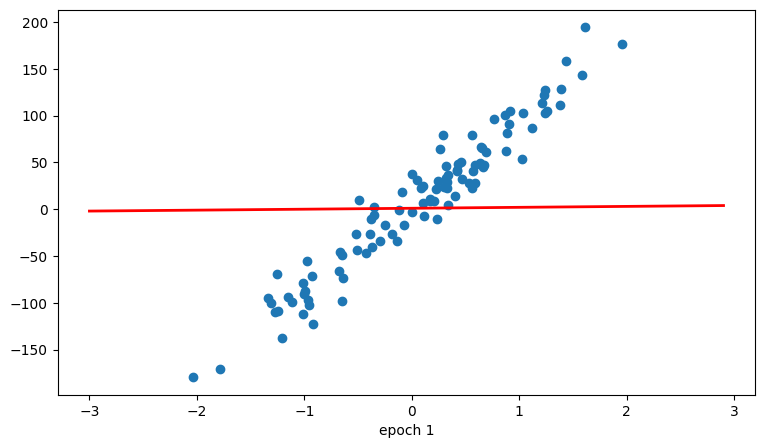

In [68]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*gd.mList[i] + gd.bList[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)
anim.save("lineWithepochs.gif")
#f = r"animation4.gif" 
#writergif = animation.PillowWriter(fps=2) 
#anim.save(f, writer=writergif)

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)

line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*gd.mList[i] + gd.bList[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)
anim.save("lineWithepochs.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


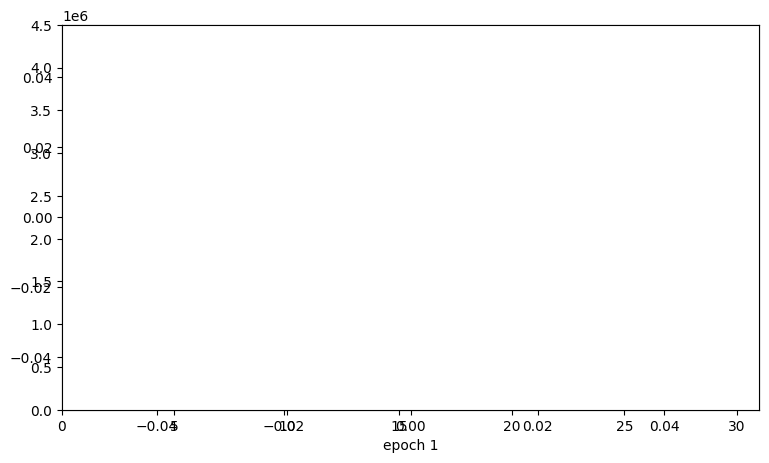

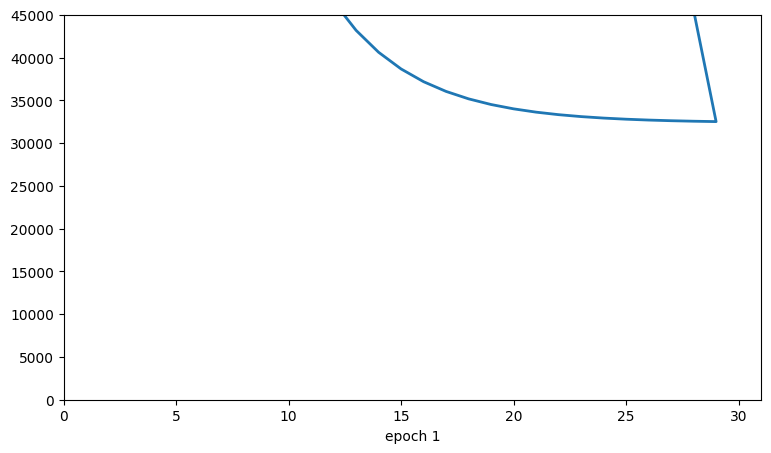